In [1]:
#importing modules

import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading input from JSON file

with open("Planar_H13_delta.json", 'r') as myfile:
    data=myfile.read()
obj=json.loads(data) #dictionary created

In [3]:
#extracting inputs from dictionary

solutes = obj['Solutes']
comp = np.array(obj['Alloy_composition'])
ke = np.array(obj['Eqm_partition_coefficient'])
me = np.array(obj['Eqm_liquidus_slope'])
Tm = obj["Solvent_melting_point"]
muk = obj['Kinetic_coeff']
vdi = obj["Interface_diffusive_speed"]
vmin = obj['Minimum_velocity']
vmax = obj['Maximum_velocity']
vstep = obj['Step_velocity']

In [4]:
#calculating non-eqbm liquidus slope

def get_mv(kv):
    num1 = me/(1-ke)
    num2 = 1-(kv*(1-np.log(kv/ke)))
    return num1*num2

In [8]:
#looping through velocities

velocities = []
temperatures = []

v = vmin
while v<vmax:
    kv = (ke+(v/vdi)) / (1+(v/vdi))
    mv = get_mv(kv)
    T = Tm + np.sum(mv*comp) - (v/muk)
    
    #displaying output
    print("Solidification Velocity:", np.round(v, 5), "m/s")
    print("Non-eqbm partition coeffecient:", np.round(kv, 5))
    print("Non-eqbm liquidus slope:", np.round(mv,5))
    print("Interface Temperature:", np.round(T,2), "K")
    print("-"*40)
    
    velocities.append(v)
    temperatures.append(T)
    
    if v>1:
        vstep = 1E-2
    v = v+vstep

Solidification Velocity: 0.0001 m/s
Non-eqbm partition coeffecient: [0.15618 0.72373 0.71873 0.67263]
Non-eqbm liquidus slope: [-8580.03753  -261.256    -521.308   -1256.316  ]
Interface Temperature: 1769.58 K
----------------------------------------
Solidification Velocity: 0.0051 m/s
Non-eqbm partition coeffecient: [0.16038 0.7251  0.72013 0.67426]
Non-eqbm liquidus slope: [-8580.62904  -261.25728  -521.31062 -1256.32387]
Interface Temperature: 1769.56 K
----------------------------------------
Solidification Velocity: 0.0101 m/s
Non-eqbm partition coeffecient: [0.16454 0.72646 0.72151 0.67587]
Non-eqbm liquidus slope: [-8582.3154   -261.26098  -521.31819 -1256.34652]
Interface Temperature: 1769.54 K
----------------------------------------
Solidification Velocity: 0.0151 m/s
Non-eqbm partition coeffecient: [0.16865 0.72781 0.72288 0.67747]
Non-eqbm liquidus slope: [-8585.03697  -261.26701  -521.33053 -1256.3835 ]
Interface Temperature: 1769.52 K
-------------------------------------

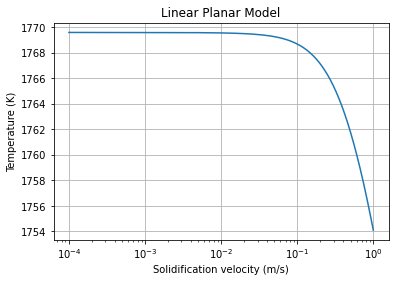

In [10]:
#plotting v vs T

plt.plot(velocities,temperatures)
plt.xscale("log")
plt.title("Linear Planar Model")
plt.xlabel("Solidification velocity (m/s)")
plt.ylabel("Temperature (K)")
plt.grid("True")
plt.show()

#other output

